In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from util.utils import tradex_features, convert_df
import os
import pickle

symbol= 'BTC/USDT'
procent= 100
shift = -7   
buy_amount = 100  # Amount in Euro to buy BTC



# Sample indicator data in a Pandas DataFrame (you should replace this with your actual data)
def _get_data():
    # self.config['Path']['2020_30m_data']
    pickle_file_name = 'data/pickle/all/30m_data_all.pkl'

    if not os.path.exists(pickle_file_name):
        print('No data has been written')
        return pd.DataFrame()  # Return an empty DataFrame instead of None for consistency

    with open(pickle_file_name, 'rb') as f:
        data_ = pickle.load(f)

    if data_.empty:
        print("Loaded data is empty.")
        return pd.DataFrame()

    data = convert_df(data_)

    if data.empty or data.isnull().values.any():
        print("Converted data is empty or contains NaN values.")
        return pd.DataFrame()

    # float(self.config['Data']['percentage'])
    percentage_to_keep = procent / 100.0
    rows_to_keep = int(len(data) * percentage_to_keep)
    data = data.head(rows_to_keep)

    print(f'Dataframe shape: {data.shape}')
    return data



In [2]:
df = tradex_features(symbol,_get_data())
df

                               open      high       low     close  \
date                                                                
2020-01-01 00:00:00+00:00   7182.43   7188.10   7170.69   7172.36   
2020-01-01 00:30:00+00:00   7172.79   7179.45   7170.15   7171.55   
2020-01-01 01:00:00+00:00   7171.43   7210.00   7171.10   7205.90   
2020-01-01 01:30:00+00:00   7205.89   7225.00   7200.00   7210.24   
2020-01-01 02:00:00+00:00   7210.38   7232.99   7206.46   7221.50   
...                             ...       ...       ...       ...   
2023-09-26 21:30:00+00:00  26151.43  26192.71  26145.44  26165.40   
2023-09-26 22:00:00+00:00  26165.39  26207.89  26161.90  26197.79   
2023-09-26 22:30:00+00:00  26197.78  26201.72  26152.65  26157.65   
2023-09-26 23:00:00+00:00  26157.65  26206.81  26150.08  26178.46   
2023-09-26 23:30:00+00:00  26178.46  26240.00  26176.35  26221.67   

                                 volume  
date                                     
2020-01-01 00:00:0

f:\Project\Programming\own\python\tradingApp\model\features.py:429: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9.76985955e+10 1.02844015e+11 8.01682608e+10 ... 1.67528268e+11
 1.44587398e+11 1.97074520e+11]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mfi = ta.mfi(
f:\Project\Programming\own\python\tradingApp\model\features.py:429: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3.62281255e+10 6.47863208e+10 6.64816246e+10 ... 2.66399535e+11
 3.11007568e+11 1.48041459e+11]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mfi = ta.mfi(
f:\Project\Programming\own\python\tradingApp\model\features.py:429: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9.76985955e+10 1.02844015e+11 8.0168260

,open,high,low,close,volume,ema55H,ema55L,ema_100,ema_200,lsma,...,s_vwap,mfi,mfi_sum,s_dots,b_wave,l_wave,wave_space,dots,rsi14,rsi40
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00+00:00,7182.43,7188.10,7170.69,7172.36,1.075887e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN
2020-01-01 00:30:00+00:00,7172.79,7179.45,7170.15,7171.55,5.050119e+06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN
2020-01-01 01:00:00+00:00,7171.43,7210.00,7171.10,7205.90,1.357742e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN
2020-01-01 01:30:00+00:00,7205.89,7225.00,7200.00,7210.24,1.426063e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN
2020-01-01 02:00:00+00:00,7210.38,7232.99,7206.46,7221.50,1.110315e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26 21:30:00+00:00,26151.43,26192.71,26145.44,26165.40,5.544097e+06,26271.940592,26208.216980,26283.292117,26389.144247,26135.846241,...,7.521835,46.461270,43.206830,0,-18.873295,-25.586546,-6.713251,0,44.230588,45.765750
2023-09-26 22:00:00+00:00,26165.39,26207.89,26161.90,26197.79,6.396847e+06,26269.653071,26206.562802,26281.599005,26387.240224,26134.644865,...,7.521784,51.819821,44.418738,0,-21.715032,-23.520157,-1.805125,0,48.663621,47.290300
2023-09-26 22:30:00+00:00,26197.78,26201.72,26152.65,26157.65,5.656769e+06,26267.226890,26204.637344,26279.144570,26384.955744,26133.735165,...,7.521734,57.797967,45.918094,0,-24.448968,-25.576959,-1.127991,0,43.996257,45.658918


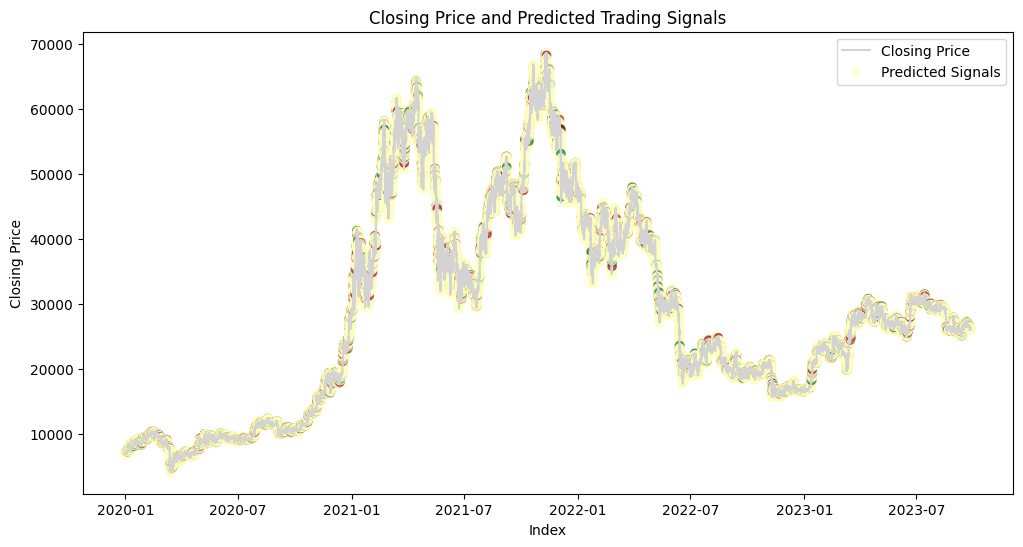

In [3]:

# Define a target variable (e.g., Buy: 1, Sell: -1, Hold: 0) based on your strategy
df['Signal'] = df.dots

# Split data into features (X) and target (y)
X = df[['l_wave', 'b_wave']]
y = df['Signal']

# Train a decision tree classifier (you should replace this with your model)
model = DecisionTreeClassifier()
model.fit(X, y)

# Generate predictions on the dataset
df['Predicted_Signal'] = model.predict(X)

# Visualize the closing price and predicted signals
plt.figure(figsize=(12, 6))


# Plot the closing price
plt.plot(df.index, df['close'], label='Closing Price', color='lightgray')

# Scatter plot for predicted signals
# Color-code the scatter plot based on the predicted signal
plt.scatter(df.index, df['close'], c=df['Predicted_Signal'], cmap='RdYlGn', label='Predicted Signals', alpha=0.6)

plt.title('Closing Price and Predicted Trading Signals')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
# Example setup
maker_fee_rate = 0.03  # Maker's fee as a decimal

# Assuming 'df' is a DataFrame containing your 'close' prices
shift = -3  # Future price look-ahead
future_price = df['close'].shift(shift)  # Shifted for future prices

# Calculate expected change in price (positive for price up, negative for price down)
expected_price_change = future_price - df['close']

# Calculate the absolute expected profit (ignoring the direction of the trade)
df['expected_profit'] = (abs(expected_price_change) / df['close']) * buy_amount

# Apply trading fee to adjust the expected profit for the cost of trading
df['expected_profit_after_fee'] = df['expected_profit'] - (buy_amount * maker_fee_rate)

# Determine the trading signal with an additional condition for the trading fee profitability
df['target'] = np.where((df['expected_profit_after_fee'] > 0) & (future_price > df['close']), 1,  # Long signal
                        np.where((df['expected_profit_after_fee'] < 0) & (future_price < df['close']), -1,  # Short signal
                                 0))  # No action

# Drop rows with missing values due to shifting
df.dropna(inplace=True)

df['target'].where(df['target'] == -1)

date
2020-01-05 03:30:00+00:00   -1
2020-01-05 04:00:00+00:00    0
2020-01-05 04:30:00+00:00   -1
2020-01-05 05:00:00+00:00    0
2020-01-05 05:30:00+00:00   -1
                            ..
2023-09-26 20:00:00+00:00   -1
2023-09-26 20:30:00+00:00    0
2023-09-26 21:00:00+00:00    0
2023-09-26 21:30:00+00:00    0
2023-09-26 22:00:00+00:00    0
Name: target, Length: 65130, dtype: int32

In [6]:
# Select features and target
X = df[['l_wave', 'b_wave']]  # Add more features if necessary
y = df['target']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Using a Random Forest Classifier as an example
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.5085981882389068


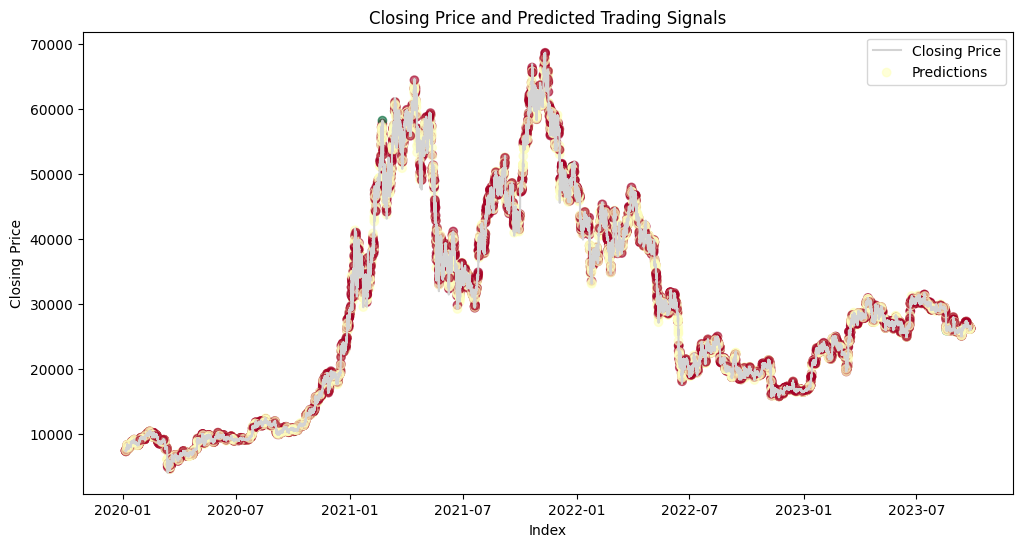

In [10]:
plt.figure(figsize=(12, 6))

# Plot the closing price
plt.plot(df.index, df['close'], label='Closing Price', color='lightgray')

# Scatter plot for actual and predicted
# Note: We need to align the indices of X_test and y_test to get the correct dates
aligned_X_test = df.loc[X_test.index]
plt.scatter(aligned_X_test.index, aligned_X_test['close'], c=predictions, cmap='RdYlGn', label='Predictions', alpha=0.6)

plt.title('Closing Price and Predicted Trading Signals')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()



In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras import layers, models

# Assuming 'df' is your DataFrame with the trading data.
# Ensure the 'dots' column is of integer type
df['dots'] = df['dots'].astype(int)

# Select features - this is just an example, select the columns you need
features = df[['open', 'high', 'low', 'close', 'volume', 'b_wave', 'l_wave', 'dots']]

# Drop any rows with NaN values or you can also impute them
features = features.dropna()

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(features)

# Labels (targets) are in the 'target' column
labels = df['target'][features.index].values

# Reshape the data to a (height, width, channels) format
# The shape will depend on the number of features you choose and the way you want to organize them.
# Make sure the total number of features fits the height * width.
height, width, channels = 4, 2, 1  # Adjust 'height' and 'width' as necessary
data_reshaped = data_normalized.reshape(-1, height, width, channels)

# Remap labels: 0 -> 0 (no action), 1 -> 1 (long), -1 -> 2 (short)
labels_mapped = np.where(labels == -1, 2, labels)

# Then, use these mapped labels for your train-test split and model training
X_train, X_test, y_train, y_test ,indices_train, indices_test= train_test_split(data_reshaped, labels_mapped, df.index, test_size=0.2)

# Define your CNN model architecture
image_height, image_width = height, width  # Update with your 'height' and 'width'

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_height, image_width, channels)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # for 3 classes
])



# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Save the model
model.save('trading_signal_model.h5')





Epoch 1/10


1629/1629 [==============================] - 11s 3ms/step - loss: 0.7338 - accuracy: 0.5078 - val_loss: 0.7316 - val_accuracy: 0.5137
Epoch 2/10
1629/1629 [==============================] - 5s 3ms/step - loss: 0.7278 - accuracy: 0.5181 - val_loss: 0.7291 - val_accuracy: 0.5294
Epoch 3/10
1629/1629 [==============================] - 5s 3ms/step - loss: 0.7257 - accuracy: 0.5252 - val_loss: 0.7298 - val_accuracy: 0.5102
Epoch 4/10
1629/1629 [==============================] - 5s 3ms/step - loss: 0.7243 - accuracy: 0.5256 - val_loss: 0.7261 - val_accuracy: 0.5315
Epoch 5/10
1629/1629 [==============================] - 5s 3ms/step - loss: 0.7239 - accuracy: 0.5274 - val_loss: 0.7291 - val_accuracy: 0.5167
Epoch 6/10
1629/1629 [==============================] - 5s 3ms/step - loss: 0.7234 - accuracy: 0.5301 - val_loss: 0.7269 - val_accuracy: 0.5351
Epoch 7/10
1629/1629 [==============================] - 5s 3ms/step - loss: 0.7229 - accuracy: 0.5318 - val_loss: 0.7299 - val_acc

d:\Users\Maart\anaconda3\envs\app\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = load_model('trading_signal_model.h5')


predictions = model.predict(X_test)
confidence_threshold = 0.20  # Only act on predictions with >90% confidence
confident_indices = predictions.max(axis=1) > confidence_threshold  # Indices of confident predictions

# Apply the same filtering to y_test to ensure size matches
y_test_confident = y_test[confident_indices]
predicted_classes = np.argmax(predictions, axis=1)[confident_indices]


unique_labels = np.unique(np.concatenate([y_test_confident, predicted_classes]))
target_names = ['No Action', 'Long', 'Short']
# Filter target_names to match the unique labels found
filtered_target_names = [target_names[i] for i in unique_labels]

cr = classification_report(y_test_confident, predicted_classes, target_names=filtered_target_names, labels=unique_labels)
print('Classification Report:\n', cr)

408/408 [==============================] - 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

   No Action       0.54      0.50      0.52      6575
        Long       0.40      0.02      0.04       105
       Short       0.52      0.57      0.54      6346

    accuracy                           0.53     13026
   macro avg       0.49      0.36      0.37     13026
weighted avg       0.53      0.53      0.53     13026



In [13]:
actions_data = []
btc_price = df.loc[indices_test, 'close']  # Extract closing prices for the test dataset
date = btc_price.index
initial_balance = 10000  # Starting balance in USD or Euro
btc_held = 0  # Quantity of BTC held
maker_fee_rate = 0.03  # Maker's fee as a decimal

for i in range(len(predicted_classes)):
    signal = predicted_classes[i]
    action = {}
    action['Date'] = btc_price.index[i]  # Assuming the date or timestamp is the index of btc_price
    action['BTC_Price'] = btc_price.iloc[i]


    if signal == 1 and initial_balance >= buy_amount:  # Buy signal and enough balance to buy €10 worth of BTC
        total_cost = buy_amount * (1 + maker_fee_rate)  # Total cost including the maker's fee
        if initial_balance >= total_cost:  # Check if balance is sufficient including the fee
            btc_bought = buy_amount / btc_price.iloc[i]
            btc_held += btc_bought
            initial_balance -= total_cost  # Subtract the total cost from initial_balance
            action['Action'] = 'BUY'
        else:
            action['Action'] = 'BUY_FAILED'  # Not enough balance to cover the cost + fee
    elif signal == 2 and btc_held > 0:  # Sell signal
        btc_value = btc_held * btc_price.iloc[i] * (1 - maker_fee_rate)  # Value after subtracting the maker's fee
        sell_amount = min(buy_amount, btc_value)  # Cannot sell more than the btc_value equivalent
        btc_sold = sell_amount / btc_price.iloc[i]
        btc_held -= btc_sold
        initial_balance += sell_amount  # Add the Euro value of the sold BTC to initial_balance, fee already deducted
        action['Action'] = 'SELL'
    else:  # Hold or no action
        action['Action'] = 'HOLD'

    action['BTC_Held'] = btc_held
    action['USD_Balance'] = initial_balance
    actions_data.append(action)

# Convert to DataFrame
actions_df = pd.DataFrame(actions_data)
actions_df.to_csv('trading_actions.csv', index=True)  # Adjust the path as needed

final_balance = initial_balance + (btc_held * btc_price.iloc[-1])  # Final balance
net_profit = final_balance - 10000  # Calculate net profit or loss


print(f'Net Profit: ${net_profit}')

Net Profit: $1219.140866652062


In [14]:
import ccxt

def fetch_real_time_data(symbol='BTC/USD', exchange_id='binance', timeframe='1m', limit=300):
    """Fetch recent market data for a given symbol from a specified exchange.

    Args:
        symbol (str): The symbol to fetch data for (e.g., 'BTC/USD').
        exchange_id (str): The exchange ID (according to ccxt) to fetch data from.
        timeframe (str): The timeframe for candlestick data ('1m', '5m', '1h', etc.).
        limit (int): The number of recent data points to fetch.

    Returns:
        pd.DataFrame: A DataFrame containing the fetched candlestick data.
    """
    exchange_class = getattr(ccxt, exchange_id)
    exchange = exchange_class()
    if exchange.has['fetchOHLCV']:
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit)
        df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
        df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
        return df
    else:
        print(f"{exchange_id} does not support fetching OHLCV data.")
        return None

# Example usage
real_time_data = fetch_real_time_data()


In [15]:
def preprocess_data(data, scaler=None, height=4, width=2, channels=1):
    """
    Preprocess the input DataFrame for use with a machine learning model.
    
    Args:
        df (pd.DataFrame): Input DataFrame containing the trading data.
        scaler (MinMaxScaler, optional): An instance of MinMaxScaler if normalization
            should be applied using an existing scaler (useful for real-time data).
        height (int): The height for reshaping the data.
        width (int): The width for reshaping the data.
        channels (int): The number of channels for reshaping the data.

    Returns:
        np.array: The preprocessed data ready for model input.
        MinMaxScaler: The scaler used for data normalization (if not provided).
    """
    # Assuming 'df' already has the necessary columns and types
    # Select features - customize this as needed
    features = data[['open', 'high', 'low', 'close', 'volume', 'b_wave', 'l_wave', 'dots']]
    
    # Optionally handle missing values
    features = features.dropna()

    # Normalize the data 
    if scaler is None:
        scaler = MinMaxScaler()
        data_normalized = scaler.fit_transform(features)
    else:
        data_normalized = scaler.transform(features)
    
    # Reshape the data to a (height, width, channels) format
    data_reshaped = data_normalized.reshape(-1, height, width, channels)
    
    return data_reshaped, scaler



In [16]:
import time

# Load your model
model = load_model('trading_signal_model.h5')

# Initialize variables
initial_balance = 10000
btc_held = 0
maker_fee_rate = 0.03  # Adjust based on actual exchange fees

# Initialize a DataFrame to store trade actions
trades_df = pd.DataFrame(columns=['Time', 'Action', 'BTC_Price', 'BTC_Amount', 'Balance'])


while True:
    try:
        # Fetch real-time data
        real_time_data = fetch_real_time_data()
        
        # Preprocess the data
        preprocessed_data, _ = preprocess_data(tradex_features(symbol,real_time_data))  # Adjust according to your preprocessing function
        
        # Make a prediction
        prediction = model.predict(preprocessed_data)
        predicted_class = np.argmax(prediction, axis=1)[0]  # Simplified for single prediction
        
        # Get the most recent BTC price from real_time_data
        # Assuming 'close' column contains the closing price
        btc_price = real_time_data['close'].iloc[-1]

        # Get current time
        current_time = real_time_data['date'].iloc[-1]
        
        # Simplified trading logic (1: buy, -1: sell, 0: hold)
        if predicted_class == 1 and initial_balance >= 10:
            print("Executing buy order")
            action = 'BUY'
            # Buy logic using the most recent BTC price
            btc_amount = 10 / btc_price
            btc_held += btc_amount
            initial_balance -= 10
        elif predicted_class == -1 and btc_held > 0:
            print("Executing sell order")
            action = 'SELL'
            # Sell logic using the most recent BTC price
            btc_amount = btc_held
            initial_balance += btc_held * btc_price
            btc_held = 0
        else:
            print("Holding")
            action = 'HOLD'
            btc_amount = None  # No BTC bought or sold
        
        new_row = pd.DataFrame({'Time': [current_time], 'Action': [action], 'BTC_Price': [btc_price], 'BTC_Amount': [btc_amount], 'Balance': [initial_balance]})
        trades_df = pd.concat([trades_df, new_row], ignore_index=True)

        # Optionally, save to CSV every loop or at certain intervals
        trades_df.to_csv('trades.csv', index=True)
        
        # Print current balance and BTC held for monitoring
        print(f"Current Balance: {initial_balance}, BTC Held: {btc_held}")
        
        # Wait for a minute before next iteration
        time.sleep(60)
        
    except KeyboardInterrupt:
        # Save before exiting
        trades_df.to_csv('trades.csv', index=True)
        print("Stopping...")
        break
    except Exception as e:
        print(f"An error occurred: {e}")
        # Optionally, save the DataFrame periodically or on error
        trades_df.to_csv('trades.csv', index=True)
        time.sleep(60)


